# Utilities

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import sklearn 
from skimage import transform
from skimage.transform import rotate, AffineTransform,warp
from skimage.util import random_noise
from skimage import util
from skimage.filters import gaussian
from sklearn import preprocessing



import cv2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [30]:
def showImage(image):
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

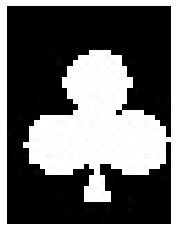

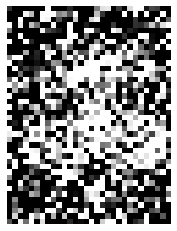

In [65]:

image = cv2.imread("DataSet/trainData/club/2C0.jpg", cv2.COLOR_BGR2GRAY)
showImage(image)

img = image

image = rotate(img, angle=5); 
showImage(image)
image = rotate(img, angle=-5); 
showImage(image)
image = transform.warp(img, AffineTransform(shear=-0.2), order=1, preserve_range=True, mode='wrap');
showImage(image)
image = transform.warp(img, AffineTransform(shear=0.1), order=1, preserve_range=True, mode='wrap'); 
showImage(image)


In [66]:
# Image Augmentation, referncee: https://www.codespeedy.com/image-augmentation-using-skimage-in-python/

def augmentImage(img):
    augmentedImages=[img.flatten()]
    image = rotate(img, angle=5); augmentedImages.append(image.flatten())
    image = rotate(img, angle=-5); augmentedImages.append(image.flatten())
    image = transform.warp(img, AffineTransform(shear=-0.2), order=1, preserve_range=True, mode='wrap'); augmentedImages.append(image.flatten())
    image = transform.warp(img, AffineTransform(shear=0.1), order=1, preserve_range=True, mode='wrap'); augmentedImages.append(image.flatten())
    return augmentedImages
    
    


# Import and split the data

In [67]:
import os
trainData = []
trainLabels = []

dire="DataSet/trainData" 

print(os.listdir(dire))

for innerDir in os.listdir(dire):
    for filename in os.listdir(dire+'/' +innerDir):
        # read image
        image = cv2.imread(dire+'/' + innerDir +'/' +filename, cv2.COLOR_BGR2GRAY)/255.0

        # augmentImage
        augmentedImages = augmentImage(image)
        tempLabel = [innerDir] * len(augmentedImages)

        # append images
        trainData+=augmentedImages
        trainLabels+=tempLabel

print("trainData Size:", len(trainData), "and trainLabels size:", len(trainLabels))



['10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'club', 'diamond', 'heart', 'J', 'K', 'Q', 'spade']
trainData Size: 20075 and trainLabels size: 20075


In [68]:
from sklearn.model_selection import train_test_split

# split the data
trainData, testData, trainLabels, testLabels = train_test_split(trainData, trainLabels, test_size = 0.3 , random_state=42)


# Data Augmentation

In [69]:
#  provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:
quantile_transformer = sklearn.preprocessing.QuantileTransformer(random_state=10)
X_train_trans = quantile_transformer.fit_transform(trainData)
X_test_trans = quantile_transformer.transform(testData)

In [70]:
from sklearn.preprocessing import StandardScaler
# fit_transform() is used on the data so that we can scale the data and also learn the scaling parameters of that data.
# It is also known as data normalization.

# Why? to standardize the independent features present in the data in a fixed range. 
# If feature scaling is not done, then a machine learning algorithm tends to weigh greater values,higher 
# and consider smaller values as the lower values, regardless of the unit of the values.

scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(trainData)
trainData = scaling.transform(trainData)
testData = scaling.transform(testData)

# Trainning

In [74]:
model_KNN = KNeighborsClassifier(n_neighbors=17, weights='distance',n_jobs=-1) 
model_KNN.fit(trainData, trainLabels)



KNeighborsClassifier(n_jobs=-1, n_neighbors=17, weights='distance')

In [75]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model_SVC = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter=1e3))
model_SVC.fit(trainData, trainLabels)

C:\Users\Mostafa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(max_iter=1000.0, random_state=0, tol=1e-05))])

# Save the model

In [76]:
from joblib import dump, load
# save the model
dump(model_SVC, 'model.joblib') 

# load the model
# model = load('model.joblib')

model = model_KNN

# Evaluate the model

In [77]:
from sklearn.metrics import accuracy_score

# KNN
Labels_KNN_pred = model_KNN.predict(testData) 
print("KNN Model Accuarcy", accuracy_score(testLabels, Labels_KNN_pred)) # validate the model

KNN Model Accuarcy 0.2322762742819193


In [78]:
from sklearn.metrics import accuracy_score

# SVM
Labels_SVM_pred = model_SVC.predict(testData) # test -predict the test trainData-
print("SVM Model Accuarcy", accuracy_score(testLabels, Labels_SVM_pred)) # validate the model

SVM Model Accuarcy 0.1364768387846588


# Random TestCase

In [45]:
import random 
randomIndex = random.randint(0,len(testLabels))


print("Predicted", testLabels[randomIndex], "as", model.predict([testData[randomIndex]]),
    "With confidence", model.predict_proba([testData[randomIndex]]))



Predicted 7 as ['7'] With confidence [[0.         0.29304255 0.         0.         0.12647798 0.
  0.52338444 0.05709503 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]]


# Test Data

dataSet/testData/0.jpeg
KNN: ['diamond'] SVM: ['J']


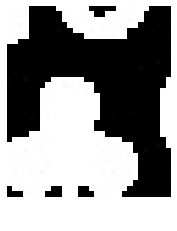

dataSet/testData/1.jpeg
KNN: ['J'] SVM: ['A']


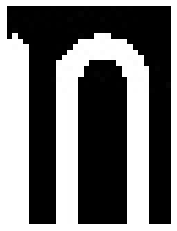

dataSet/testData/10.jpeg
KNN: ['2'] SVM: ['5']


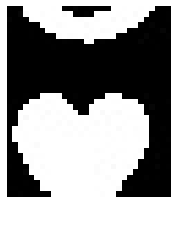

dataSet/testData/11.jpeg
KNN: ['5'] SVM: ['diamond']


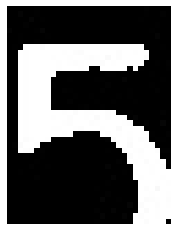

dataSet/testData/12.jpeg
KNN: ['2'] SVM: ['2']


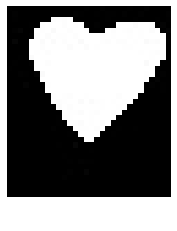

dataSet/testData/13.jpeg
KNN: ['J'] SVM: ['9']


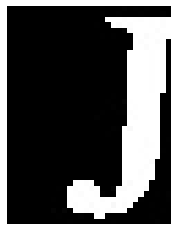

dataSet/testData/14.jpeg
KNN: ['diamond'] SVM: ['5']


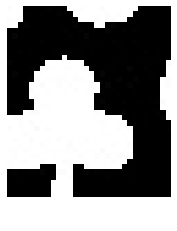

dataSet/testData/15.jpeg
KNN: ['J'] SVM: ['9']


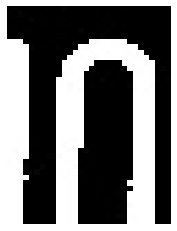

dataSet/testData/16.jpeg
KNN: ['diamond'] SVM: ['5']


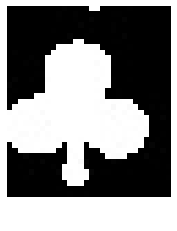

dataSet/testData/17.jpeg
KNN: ['2'] SVM: ['6']


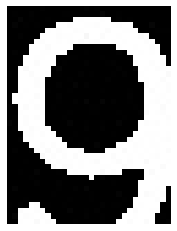

dataSet/testData/18.jpeg
KNN: ['2'] SVM: ['5']


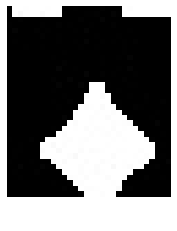

dataSet/testData/19.jpeg
KNN: ['J'] SVM: ['diamond']


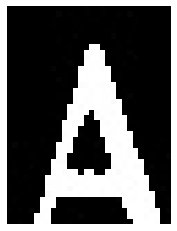

dataSet/testData/2.jpeg
KNN: ['2'] SVM: ['A']


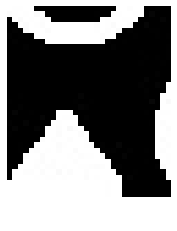

dataSet/testData/20.jpeg
KNN: ['diamond'] SVM: ['5']


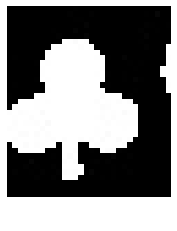

dataSet/testData/21.jpeg
KNN: ['7'] SVM: ['10']


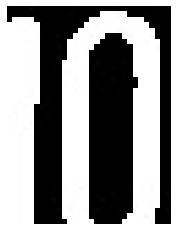

dataSet/testData/22.jpeg
KNN: ['7'] SVM: ['2']


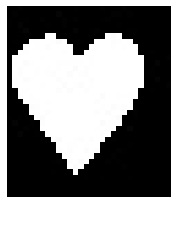

dataSet/testData/23.jpeg
KNN: ['J'] SVM: ['J']


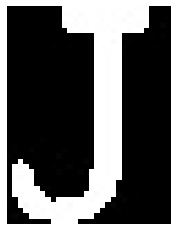

dataSet/testData/24.jpeg
KNN: ['diamond'] SVM: ['5']


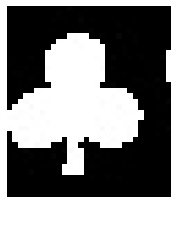

dataSet/testData/25.jpeg
KNN: ['7'] SVM: ['10']


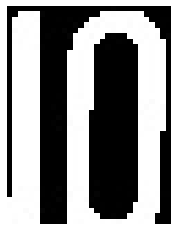

dataSet/testData/26.jpeg
KNN: ['2'] SVM: ['2']


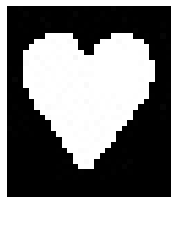

dataSet/testData/27.jpeg
KNN: ['J'] SVM: ['J']


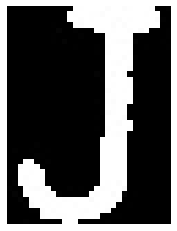

dataSet/testData/3.jpeg
KNN: ['2'] SVM: ['10']


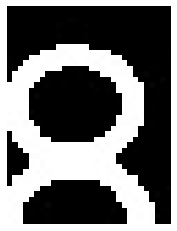

dataSet/testData/30.jpeg
KNN: ['diamond'] SVM: ['2']


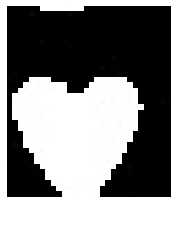

dataSet/testData/31.jpeg
KNN: ['2'] SVM: ['diamond']


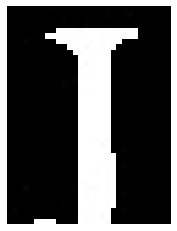

dataSet/testData/32.jpeg
KNN: ['2'] SVM: ['J']


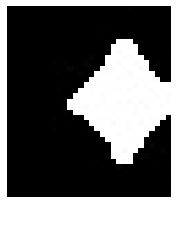

dataSet/testData/33.jpeg
KNN: ['2'] SVM: ['J']


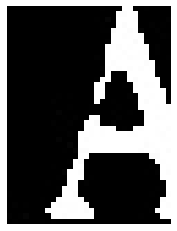

dataSet/testData/34.jpeg
KNN: ['diamond'] SVM: ['5']


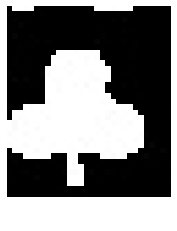

dataSet/testData/35.jpeg
KNN: ['7'] SVM: ['10']


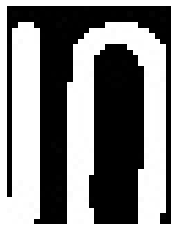

dataSet/testData/36.jpeg
KNN: ['2'] SVM: ['2']


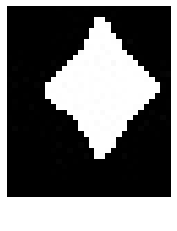

dataSet/testData/37.jpeg
KNN: ['5'] SVM: ['diamond']


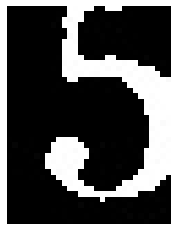

dataSet/testData/38.jpeg
KNN: ['diamond'] SVM: ['J']


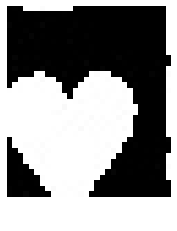

dataSet/testData/39.jpeg
KNN: ['J'] SVM: ['diamond']


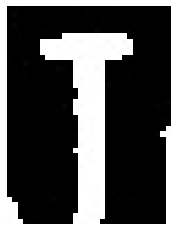

dataSet/testData/4.jpeg
KNN: ['diamond'] SVM: ['5']


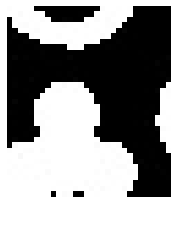

dataSet/testData/40.jpeg
KNN: ['2'] SVM: ['2']


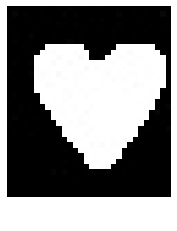

dataSet/testData/41.jpeg
KNN: ['K'] SVM: ['5']


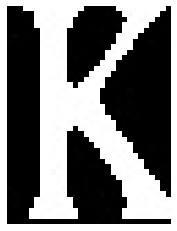

dataSet/testData/42.jpeg
KNN: ['2'] SVM: ['5']


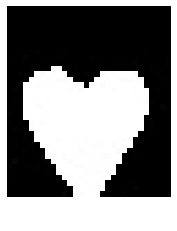

dataSet/testData/43.jpeg
KNN: ['J'] SVM: ['J']


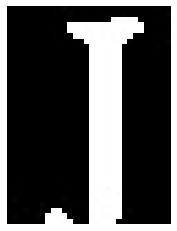

dataSet/testData/44.jpeg
KNN: ['diamond'] SVM: ['5']


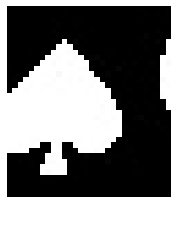

dataSet/testData/45.jpeg
KNN: ['8'] SVM: ['8']


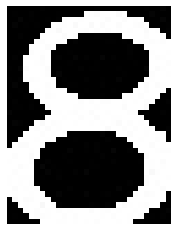

dataSet/testData/46.jpeg
KNN: ['2'] SVM: ['5']


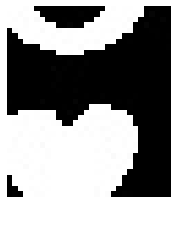

dataSet/testData/47.jpeg
KNN: ['5'] SVM: ['4']


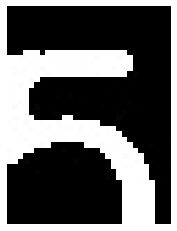

dataSet/testData/48.jpeg
KNN: ['diamond'] SVM: ['K']


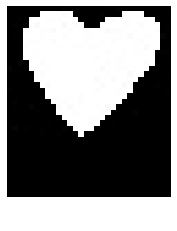

dataSet/testData/49.jpeg
KNN: ['J'] SVM: ['J']


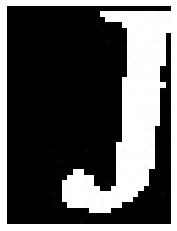

dataSet/testData/5.jpeg
KNN: ['2'] SVM: ['10']


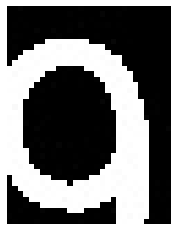

dataSet/testData/50.jpeg
KNN: ['diamond'] SVM: ['diamond']


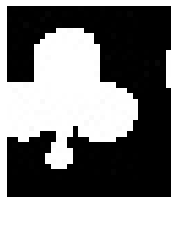

dataSet/testData/51.jpeg
KNN: ['7'] SVM: ['10']


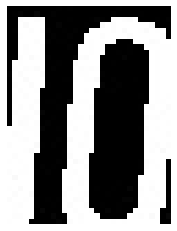

dataSet/testData/52.jpeg
KNN: ['diamond'] SVM: ['3']


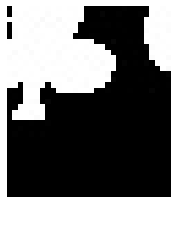

dataSet/testData/53.jpeg
KNN: ['9'] SVM: ['9']


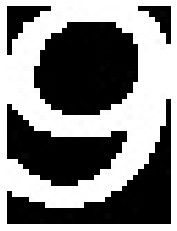

dataSet/testData/54.jpeg
KNN: ['diamond'] SVM: ['2']


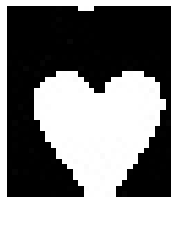

dataSet/testData/55.jpeg
KNN: ['J'] SVM: ['J']


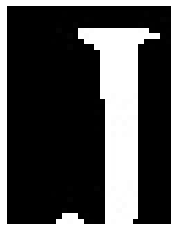

dataSet/testData/56.jpeg
KNN: ['2'] SVM: ['2']


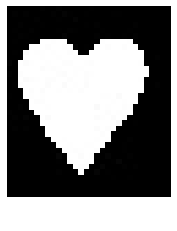

dataSet/testData/57.jpeg
KNN: ['J'] SVM: ['J']


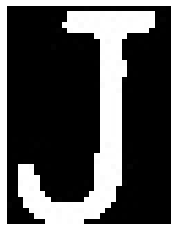

dataSet/testData/58.jpeg
KNN: ['diamond'] SVM: ['2']


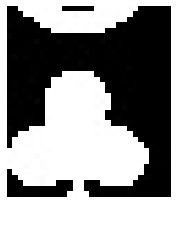

dataSet/testData/59.jpeg
KNN: ['2'] SVM: ['Q']


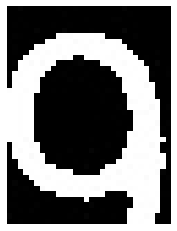

dataSet/testData/6.jpeg
KNN: ['2'] SVM: ['2']


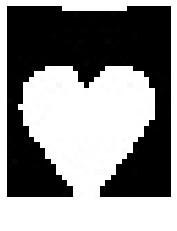

dataSet/testData/60.jpeg
KNN: ['2'] SVM: ['2']


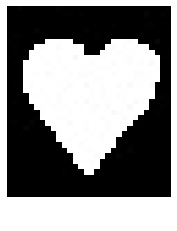

dataSet/testData/61.jpeg
KNN: ['2'] SVM: ['4']


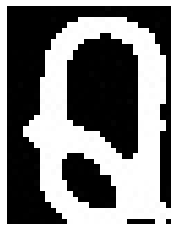

dataSet/testData/62.jpeg
KNN: ['diamond'] SVM: ['5']


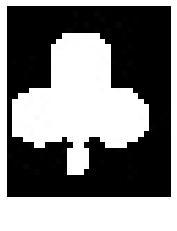

dataSet/testData/63.jpeg
KNN: ['5'] SVM: ['10']


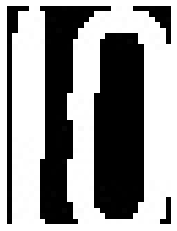

dataSet/testData/64.jpeg
KNN: ['diamond'] SVM: ['J']


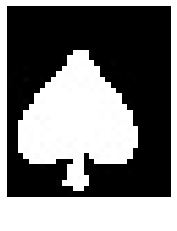

dataSet/testData/65.jpeg
KNN: ['7'] SVM: ['K']


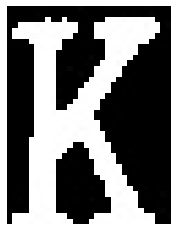

dataSet/testData/7.jpeg
KNN: ['5'] SVM: ['5']


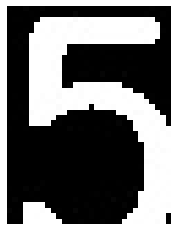

dataSet/testData/8.jpeg
KNN: ['diamond'] SVM: ['J']


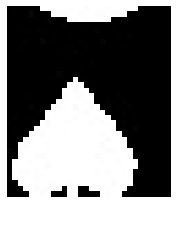

dataSet/testData/9.jpeg
KNN: ['2'] SVM: ['diamond']


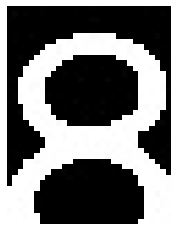

In [79]:
import os

dire="dataSet/testData/"
for filename in os.listdir(dire):
    print(dire+filename)
    image = cv2.imread(dire+filename, cv2.COLOR_BGR2GRAY)/255.0
    image.resize(40, 30)
    print("KNN:", model_KNN.predict([image.flatten()]), "SVM:", model_SVC.predict([image.flatten()]))
    showImage(image)